# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

In [3]:
!pip install kaggle

### Setup Kaggle API Key

In [4]:
#create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rifatperween"
kaggle_key = "b9a8100291fdfac3ab4d82e588075215"

#Save API token the kaggle.json file
with open("drive/MyDrive/project/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 60.3MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [9]:
import os
print(os.getcwd())


/content


In [10]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('drive/MyDrive/project/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('drive/MyDrive/project/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv('drive/MyDrive/project/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(
    label="count",
    eval_metric = 'root_mean_squared_error',
    verbosity=0,
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.059447  root_mean_squared_error      24.348643  351.445666                0.001336           0.062150            3       True         10
1         LightGBM_BAG_L2  -55.081453  root_mean_squared_error      19.815881  281.629658                0.314339          36.288378            2       True          9
2       LightGBMXT_BAG_L2  -60.914995  root_mean_squared_error      24.032968  315.095138                4.531426          69.753858            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.131266    0.060052                0.131266           0.060052            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.132650    0.107497         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.60431080595083,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.91499503656461,
  'LightGBM_BAG_L2': -55.08145325316204,
  'WeightedEnsemble_L3': -55.059446816541985}

### Create predictions from test dataset

In [16]:
predictions = predictor.predict(test)
predictions.head()

0    37.800976
1    45.426674
2    48.725548
3    53.841064
4    54.432442
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.500664
std        89.677864
min         1.098448
25%        16.188057
50%        63.443474
75%       171.962524
max       361.832062
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
predictions.lt(0).sum().sum()

0

In [19]:
predictions.describe()

count    6493.000000
mean       99.500664
std        89.677864
min         1.098448
25%        16.188057
50%        63.443474
75%       171.962524
max       361.832062
Name: count, dtype: float64

In [20]:
predictions.tail()

6488    171.269104
6489    171.269104
6490    169.821228
6491    165.877884
6492    162.941467
Name: count, dtype: float32

In [21]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [22]:
submission["count"] = predictions
# Round count column values
submission['count'] = submission['count'].apply(lambda x: round(x))
submission.to_csv("drive/MyDrive/project/submission.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 148k/148k [00:01<00:00, 118kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 15

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2024-05-01 11:58:06  first raw submission  pending                              
submission.csv               2024-05-01 10:06:02  first raw submission  complete  1.85593      1.85593       
submission_new_features.csv  2024-04-30 16:48:49  new features          complete  0.61921      0.61921       
submission.csv               2024-04-30 16:28:25  first raw submission  complete  1.79238      1.79238       
submission_new_features.csv  2024-04-28 06:51:28  new features          complete  0.59493      0.59493       
submission.csv               2024-04-28 06:45:50  first raw submission  complete  1.84779      1.84779       


#### Initial score of `1.85593`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

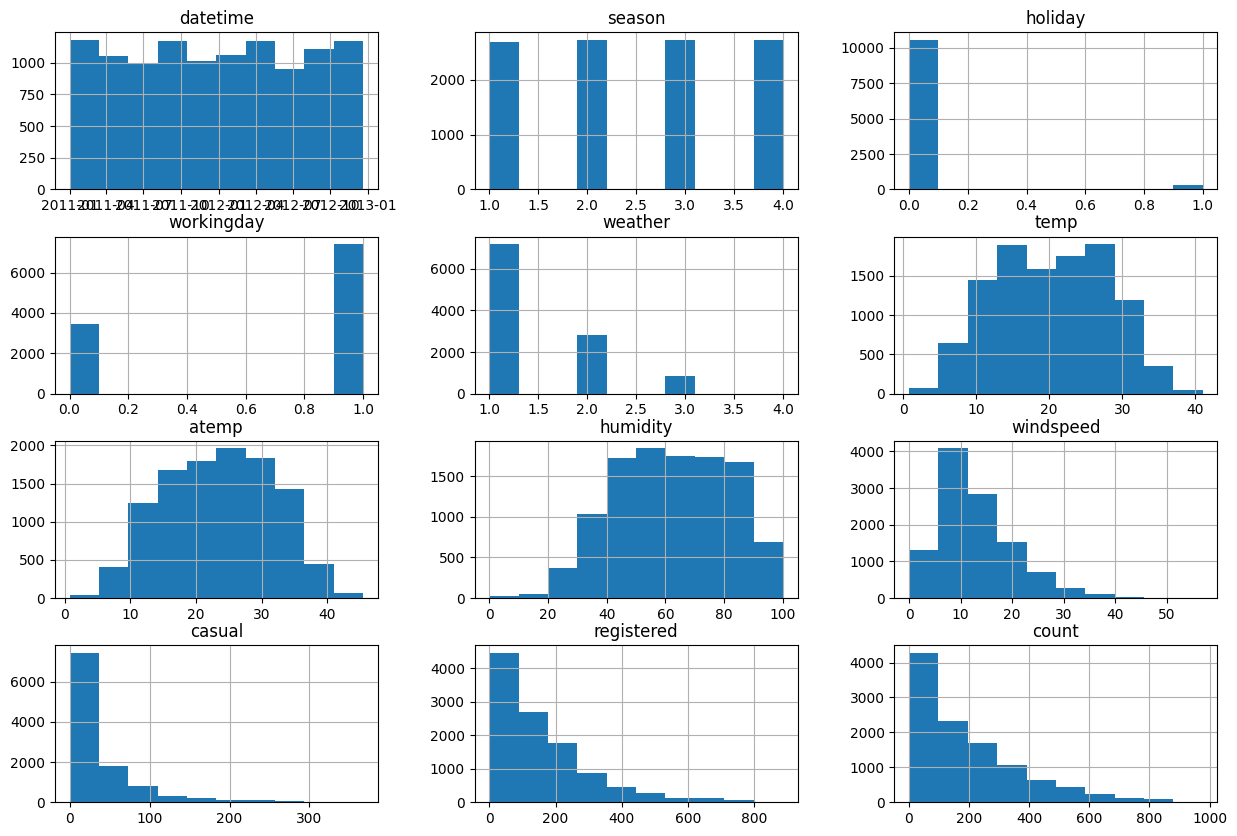

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (15,10));

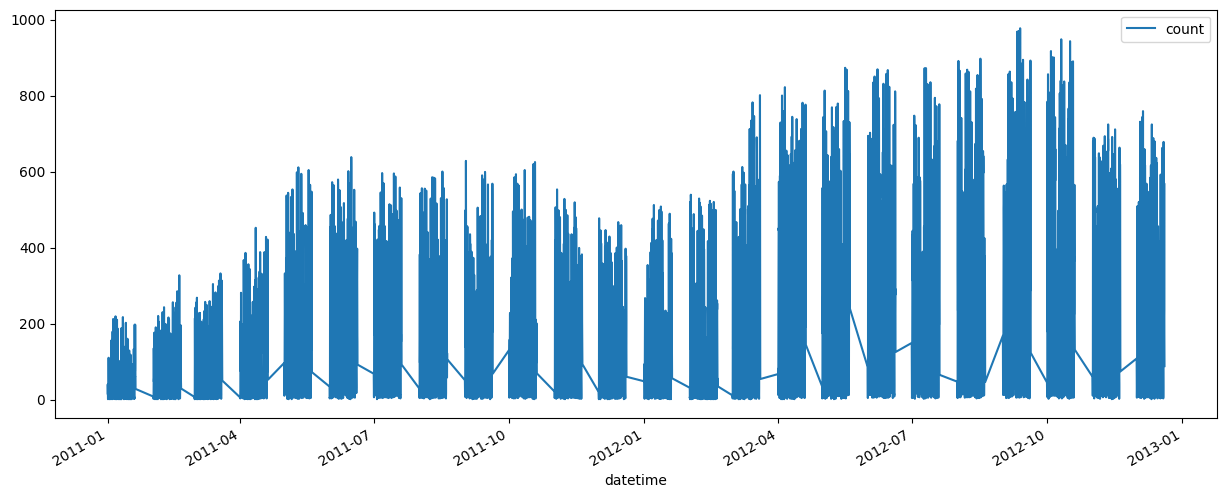

In [26]:
# time series plot for demand
train.plot(x='datetime', y='count', figsize=(15, 6));

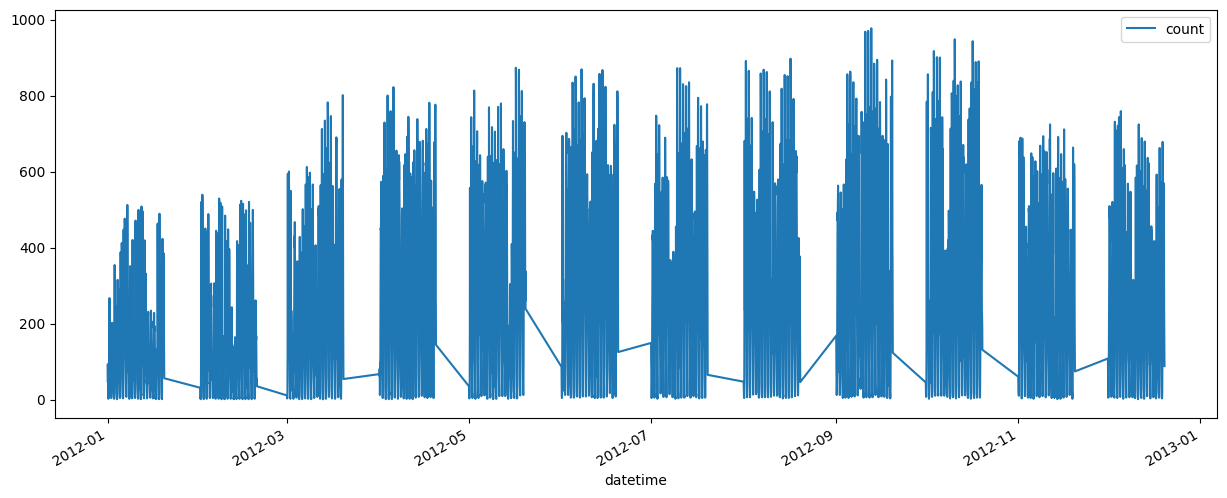

In [27]:
# time series plot for demand for a particular year
train.loc[train.datetime.dt.year == 2012].plot(x='datetime', y='count', figsize=(15, 6));

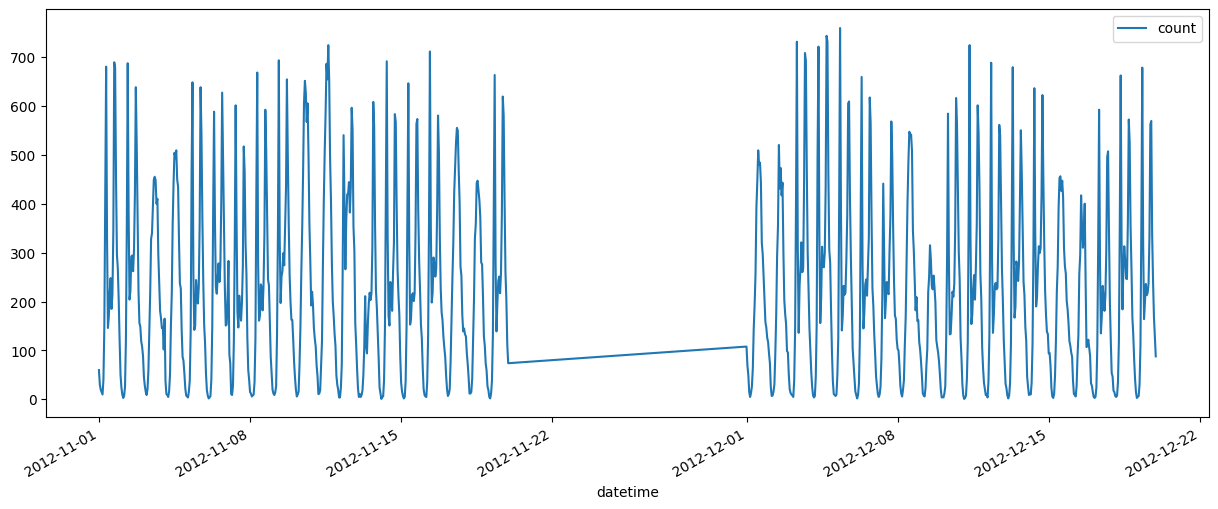

In [28]:
# time series plot for two consecutive months
train.loc[(train.datetime.dt.year == 2012) & ((train.datetime.dt.month == 11) | (train.datetime.dt.month == 12))].plot(x='datetime', y='count', figsize=(15, 6));

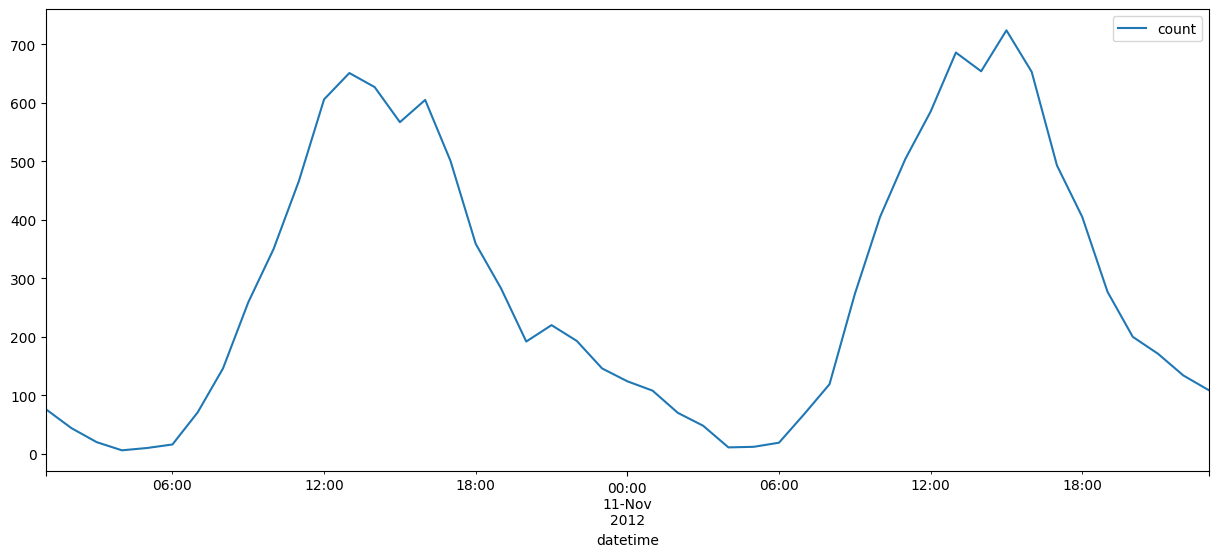

In [29]:
# time series plot for a particular weekend
train.loc[(train.datetime > '2012-11-10') & (train.datetime < '2012-11-12')].plot(x='datetime', y='count', figsize=(15, 6));

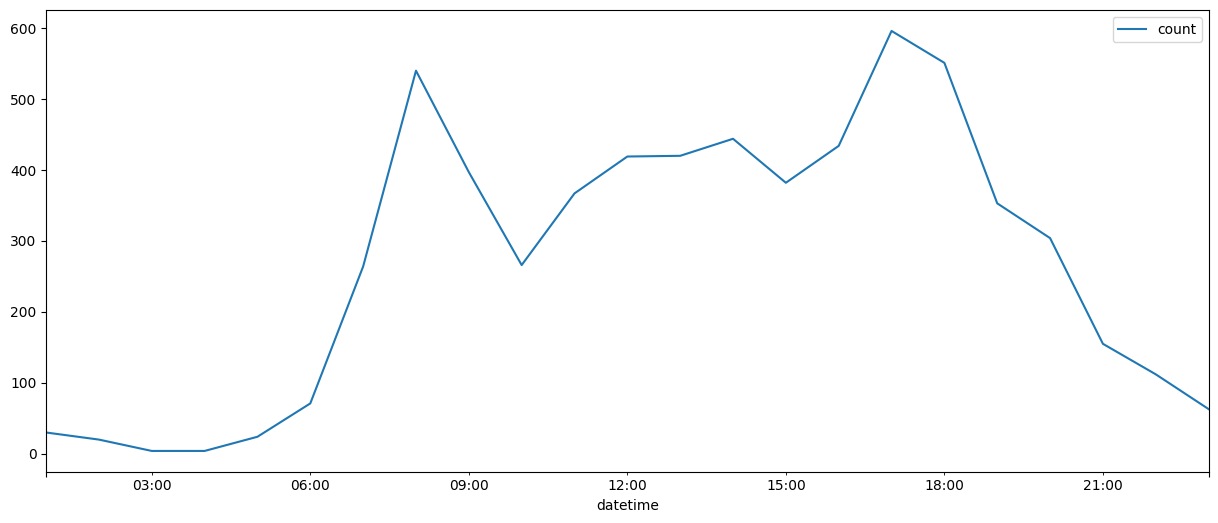

In [30]:
# time series plot for a particular weekday: Monday
train.loc[(train.datetime > '2012-11-12') & (train.datetime < '2012-11-13')].plot(x='datetime', y='count', figsize=(15, 6));

In [31]:
# Seperate hour, day, month from datetime
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

In [32]:
# create a new feature: time_of_day
def get_time_of_day(x):
    if (x > 4) and (x <= 8):
        return 0 # Early Morning
    elif (x > 8) and (x <= 12 ):
        return 1 # Morning
    elif (x > 12) and (x <= 16):
        return 2 # Noon
    elif (x > 16) and (x <= 20) :
        return 3 # Evening
    elif (x > 20) and (x <= 24):
        return 4 # Night
    elif (x <= 4):
        return 5 # Late Night


train['time_of_day'] = train['hour'].apply(get_time_of_day)
test['time_of_day'] = test['hour'].apply(get_time_of_day)

In [33]:
# create a new feature: temp_category
def get_temp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['temp_category'] = train['temp'].apply(get_temp_category)
test['temp_category'] = test['temp'].apply(get_temp_category)

In [34]:
# create a new feature: wind_category
def get_wind_category(x):
    if x <= 15:
        return 0 # normal wind
    elif (x > 10):
        return 1 # high wind


train['wind_category'] = train['windspeed'].apply(get_wind_category)
test['wind_category'] = test['windspeed'].apply(get_wind_category)

In [35]:
# create a new feature: humid_category
def get_humid_category(x):
    if x <= 30:
        return 0 # low humidity
    elif (x > 30) and (x <= 50 ):
        return 1 # normal humidity
    elif (x > 50):
        return 2 # high humidity

train['humid_category'] = train['humidity'].apply(get_humid_category)
test['humid_category'] = test['humidity'].apply(get_humid_category)

In [36]:
# create a new feature: atemp_category
def get_atemp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['atemp_category'] = train['atemp'].apply(get_atemp_category)
test['atemp_category'] = test['atemp'].apply(get_atemp_category)

In [37]:
train.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)
test.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)

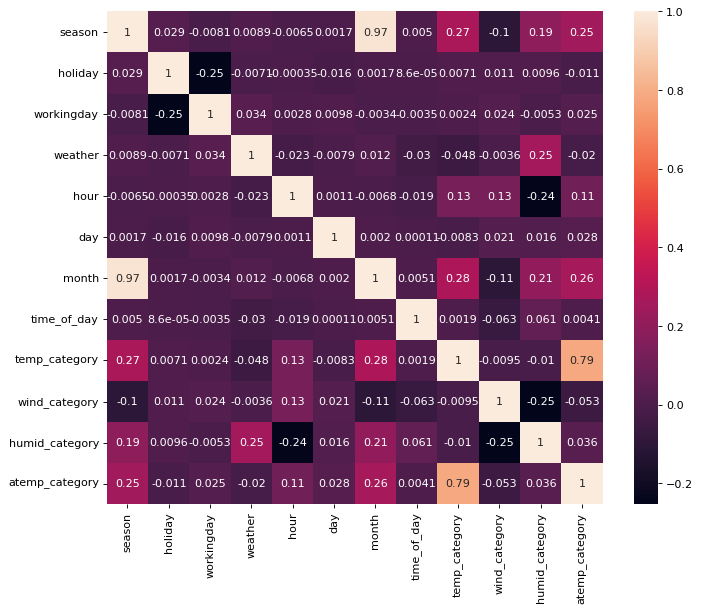

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)

sn.heatmap(train.drop(['count', 'registered','casual'], axis=1).corr(), annot=True)
plt.show()

In [39]:
# removing season column as it's having very high correlation with month
train.drop(['season'], axis=1, inplace=True)
test.drop(['season'], axis=1, inplace=True)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [40]:
train['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [41]:
train["weather"] = train["weather"].astype('category')
train["time_of_day"] = train["time_of_day"].astype('category')
train["temp_category"] = train["temp_category"].astype('category')
train["wind_category"] = train["wind_category"].astype('category')
train["humid_category"] = train["humid_category"].astype('category')
train["holiday"] = train["holiday"].astype('category')
train["workingday"] = train["workingday"].astype('category')
train["hour"] = train["hour"].astype('category')
train["month"] = train["month"].astype('category')

test["weather"] = test["weather"].astype('category')
test["time_of_day"] = test["time_of_day"].astype('category')
test["temp_category"] = test["temp_category"].astype('category')
test["wind_category"] = test["wind_category"].astype('category')
test["humid_category"] = test["humid_category"].astype('category')
test["holiday"] = test["holiday"].astype('category')
test["workingday"] = test["workingday"].astype('category')
test["hour"] = test["hour"].astype('category')
test["month"] = test["month"].astype('category')

In [42]:
# View are new feature
train.head()

,holiday,workingday,weather,casual,registered,count,hour,day,month,time_of_day,temp_category,wind_category,humid_category,atemp_category
0,0,0,1,3,13,16,0,1,1,5,0,0,2,1
1,0,0,1,8,32,40,1,1,1,5,0,0,2,1
2,0,0,1,5,27,32,2,1,1,5,0,0,2,1
3,0,0,1,3,10,13,3,1,1,5,0,0,2,1
4,0,0,1,0,1,1,4,1,1,5,0,0,2,1


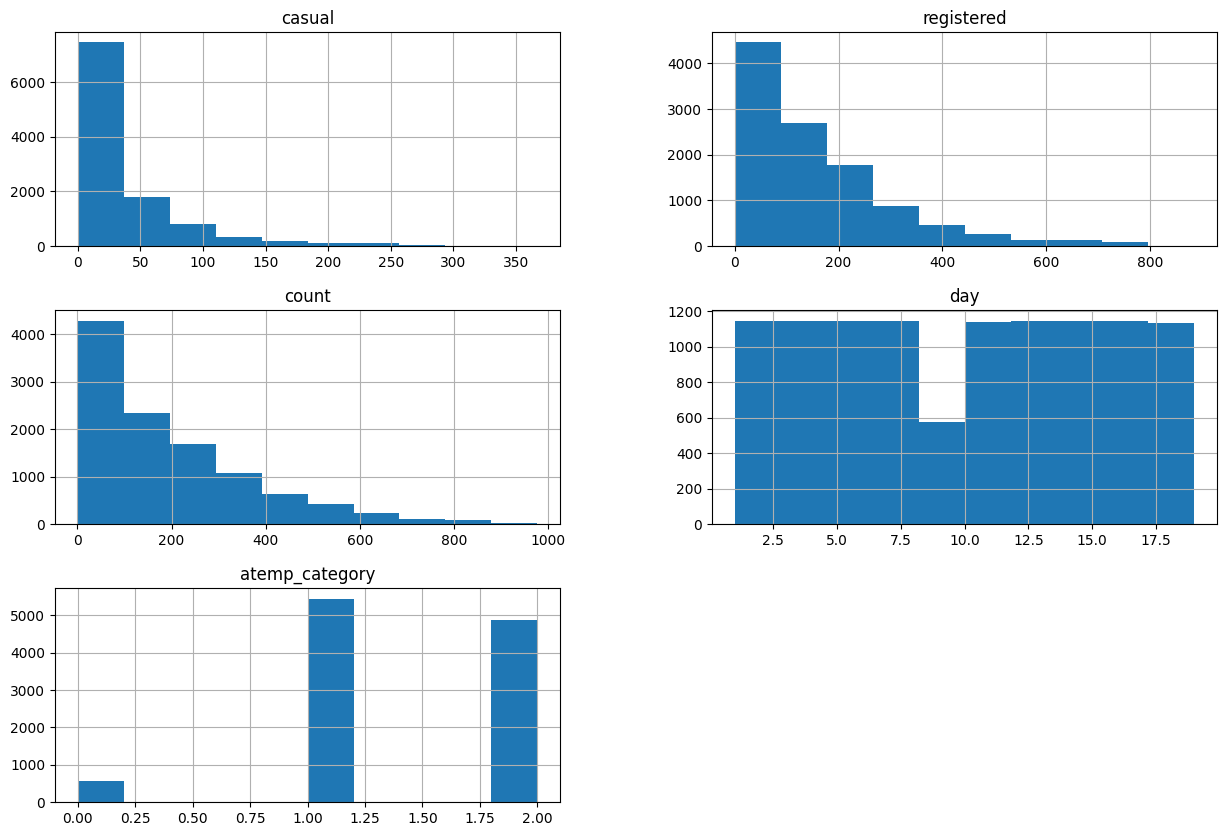

In [43]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (15,10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:
predictor_new_features = TabularPredictor(
    label="count",
    verbosity=0,
    eval_metric = 'root_mean_squared_error',
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

2024-05-01 12:08:13,083	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [45]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -61.688913  root_mean_squared_error      15.690988  323.431436                0.003017           0.076509            3       True         11
1          LightGBM_BAG_L2  -62.189753  root_mean_squared_error      14.962897  285.569107                0.460413          37.270707            2       True          9
2      WeightedEnsemble_L2  -62.615043  root_mean_squared_error      14.248853  248.295907                0.001234           0.040450            2       True          7
3          LightGBM_BAG_L1  -62.821455  root_mean_squared_error       4.753696   53.558606                4.753696          53.558606            1       True          4
4   RandomForestMSE_BAG_L2  -62.960369  root_mean_squared_error      15.227557  286.084220   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -201.39398754905193,
  'KNeighborsDist_BAG_L1': -201.39385023214737,
  'LightGBMXT_BAG_L1': -65.98549025838962,
  'LightGBM_BAG_L1': -62.82145502717451,
  'RandomForestMSE_BAG_L1': -71.57652152510794,
  'CatBoost_BAG_L1': -75.0483035586693,
  'WeightedEnsemble_L2': -62.61504314643369,
  'LightGBMXT_BAG_L2': -64.06163927522957,
  'LightGBM_BAG_L2': -62.18975333

In [46]:
# Get predictions
predictions = predictor_new_features.predict(test)

In [47]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [48]:
# Same submitting predictions
submission_new_features = pd.read_csv('drive/MyDrive/project/sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions
# Round count column values
submission_new_features['count'] = submission_new_features['count'].apply(lambda x: round(x))
submission_new_features.to_csv("drive/MyDrive/project/submission_new_features.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f drive/MyDrive/project/submission_new_features.csv -m "new features"

100% 150k/150k [00:01<00:00, 112kB/s]  
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 15

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-01 12:28:07  new features          complete  0.60931      0.60931       
submission.csv               2024-05-01 11:58:06  first raw submission  complete  1.85593      1.85593       
submission.csv               2024-05-01 10:06:02  first raw submission  complete  1.85593      1.85593       
submission_new_features.csv  2024-04-30 16:48:49  new features          complete  0.61921      0.61921       
submission.csv               2024-04-30 16:28:25  first raw submission  complete  1.79238      1.79238       
submission_new_features.csv  2024-04-28 06:51:28  new features          complete  0.59493      0.59493       
submission.csv               2024-04-28 06:45:50  first raw submission  complete  1.84779      1.84779       


#### New Score of `0.60931`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [51]:
!pip install -q ipywidgets==7.4.2
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [52]:
from autogluon.common import space
from autogluon.tabular import TabularPredictor

# Define search spaces for various hyperparameters
nn_options = {
    'num_epochs': 10,  # Fixed number of epochs (not tuned)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': space.Int(lower=26, upper=66, default=36)
}

hyperparameters = {
    'GBM': gbm_options,
    'CAT': {'iterations': 10000},
    'RF': {'n_estimators': 300},
    'XT': {'n_estimators': 300},
    'FASTAI': nn_options
}


hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'bayesopt'
}

predictor_new_hpo = TabularPredictor(
    label="count",
    verbosity=0,
    eval_metric='root_mean_squared_error',
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparameter_tune
    return super()._hyperparameter_tune(X=X, y=y, k_fold=k_fold, hpo_executor=hpo_executor, preprocess_kwargs=preprocess_kwargs, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1391, in _hyperparameter_tune
    hpo_executor.execute(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/hpo/executors.py", line 525, in execute
    scheduler = scheduler

In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -68.922838  root_mean_squared_error       0.002553  59.257348                0.001401           0.034134            3       True          6
1    ExtraTrees_BAG_L2 -69.084268  root_mean_squared_error       0.000860  33.424561                0.000321          12.517157            2       True          5
2  RandomForest_BAG_L2 -70.305784  root_mean_squared_error       0.000832  46.706057                0.000293          25.798653            2       True          4
3  WeightedEnsemble_L2 -71.317556  root_mean_squared_error       0.001719  20.929500                0.001180           0.022095            2       True          3
4  RandomForest_BAG_L1 -71.576522  root_mean_squared_error       0.000236  13.451178                0.000236          13.45

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -71.57652152510794,
  'ExtraTrees_BAG_L1': -73.8304068435874,
  'WeightedEnsemble_L2': -71.31755552757508,
  'RandomForest_BAG_L2': -70.3057844492346,
  'ExtraTrees_BAG_L2': -69.08426829691936,
  'WeightedEnsemble_L3': -68.92283843668092},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'ExtraTrees_BAG_L1': ['ExtraTrees_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'RandomForest_BAG_L2': ['RandomForest_BAG_L2'],
  'ExtraTrees_BAG_L2': ['ExtraTrees_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'RandomForest_BAG_L1': 13.4

In [54]:
predictions = predictor_new_hpo.predict(test)

In [55]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [56]:
# Same submitting predictions
submission_hpo = pd.read_csv('drive/MyDrive/project/sampleSubmission.csv', parse_dates=['datetime'])
submission_hpo["count"] = predictions
# Round count column values
submission_hpo['count'] = submission_hpo['count'].apply(lambda x: round(x))
submission_hpo.to_csv("drive/MyDrive/project/submission_new_hpo.csv", index=False)

In [66]:
!kaggle competitions submit -c bike-sharing-demand -f drive/MyDrive/project/submission_new_hpo.csv -m "new features with hyperparameters"

100% 149k/149k [00:01<00:00, 150kB/s]  
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 15

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-01 12:28:51  new features with hyperparameters  complete  0.56334      0.56334       
submission_new_features.csv  2024-05-01 12:28:07  new features                       complete  0.60931      0.60931       
submission.csv               2024-05-01 11:58:06  first raw submission               complete  1.85593      1.85593       
submission.csv               2024-05-01 10:06:02  first raw submission               complete  1.85593      1.85593       
submission_new_features.csv  2024-04-30 16:48:49  new features                       complete  0.61921      0.61921       
submission.csv               2024-04-30 16:28:25  first raw submission               complete  1.79238      1.79238       
submission_new_f

HPO Score of `0.56334`

# Charting Changes to Competition Score ( Extra )

In [68]:
# Data: model iterations and corresponding Kaggle scores
iterations = ['Base Model', 'Feature Engineered', 'HPO Tuned']
scores = [1.85593, 0.58493, 0.56334]  # Updated scores

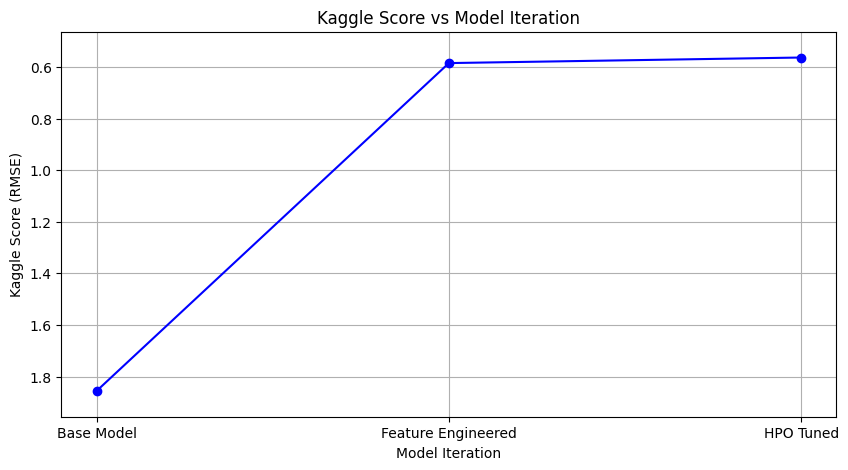

In [69]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(iterations, scores, marker='o', linestyle='-', color='b')  # Plot lines with points
plt.title('Kaggle Score vs Model Iteration')  # Title of the plot
plt.xlabel('Model Iteration')  # X-axis label
plt.ylabel('Kaggle Score (RMSE)')  # Y-axis label
plt.grid(True)  # Add a grid for easier readability
plt.ylim(max(scores) + 0.1, min(scores) - 0.1)  # Adjust the y-axis limits for clarity
plt.show()  # Display the plot


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

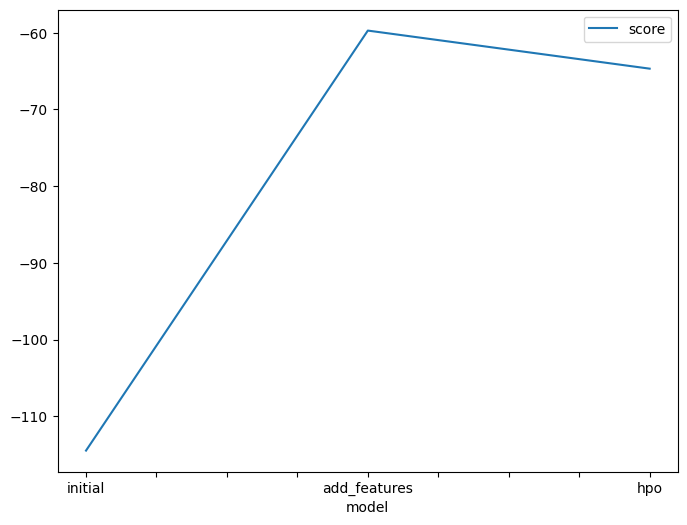

In [70]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.471103, -59.735369, -64.698247]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('drive/MyDrive/project/img/model_train_score.png')

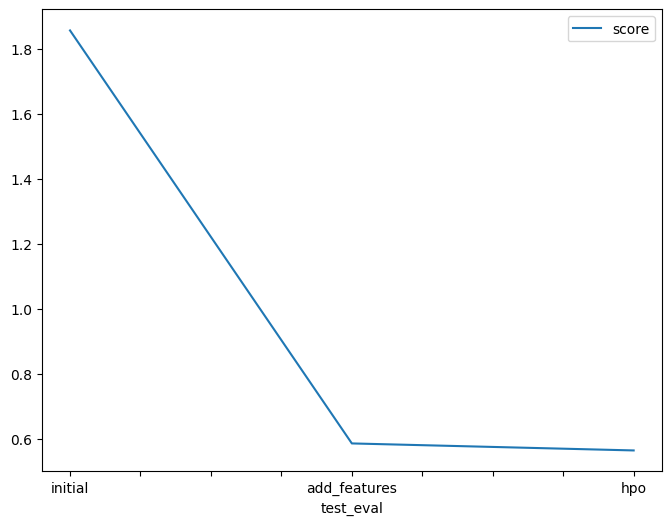

In [71]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.85593, 0.58493, 0.56334]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('drive/MyDrive/project/img/model_test_score.png')

### Hyperparameter table

In [72]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.set_option('display.max_colwidth', 60)
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "'CAT': {'iterations': 10000},'RF': {'n_estimators': 300},'XT': {'n_estimators': 300}"],
    "hpo2": ["default", "default", "GB: num_boost_round=100, num_leaves(lower=26, upper=66, default=36)"],
    "hpo3": ["default", "default", "scheduler: local, searcher: bayesopt"],
    "score": [1.85593, 0.58493, 0.56334]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.85593
1,add_features,default,default,default,0.58493
2,hpo,"'CAT': {'iterations': 10000},'RF': {'n_estimators': 300}...","GB: num_boost_round=100, num_leaves(lower=26, upper=66, ...","scheduler: local, searcher: bayesopt",0.56334
